## Análise Preditiva

### Prevendo Vendas Futuras

Você é responsável por prever o volume de vendas de uma loja com base em dados históricos. A loja já forneceu informações sobre vendas passadas e promoções.

**Objetivo:**

* Limpar e preparar os dados.
* Usar regressão linear para prever a quantidade de vendas com base no preço e promoções.
* Avaliar a precisão do modelo usando dados de teste.

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Passo 1: Importando o arquivo CSV

In [225]:
df = pd.read_csv('clima_vendas.csv')

Passo 2: Explorando os dados

In [226]:
print('Resumo estatístico dos dados:')

df.describe()

Resumo estatístico dos dados:


,Temperatura,Chuva,Vendas
count,28.0000,28.000000,28.000000
mean,29.0000,0.571429,191.785714
std,2.0367,0.503953,21.091261
min,26.0000,0.000000,150.000000
25%,27.0000,0.000000,177.500000
50%,29.0000,1.000000,190.000000
75%,31.0000,1.000000,210.000000
max,32.0000,1.000000,230.000000


Passo 3: Visualização: Scatter plot de Temperatura x Vendas

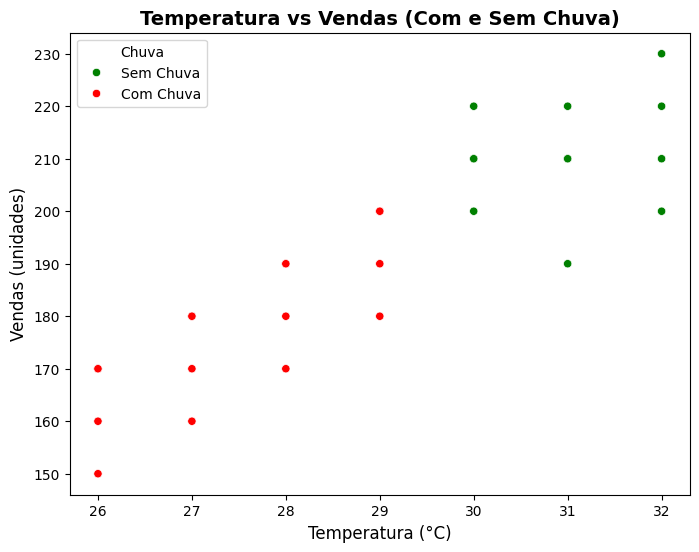

In [227]:
df['Chuva'] = df['Chuva'].map({0: 'Sem Chuva', 1: 'Com Chuva'})  # Convertendo para categórico

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='Temperatura',
    y='Vendas',
    hue='Chuva',
    palette={'Sem Chuva': 'green', 'Com Chuva': 'red'}
)

plt.title('Temperatura vs Vendas (Com e Sem Chuva)', fontsize=14, weight='bold')
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Vendas (unidades)', fontsize=12)
plt.legend(title='Chuva', fontsize=10)
plt.show()


Passo 4: Preparando os dados para o modelo de regressão

In [228]:
df['Chuva'] = df['Chuva'].map({'Sem Chuva': 0, 'Com Chuva': 1}) # Revertendo para numérico
X = df[['Temperatura', 'Chuva']]
y = df['Vendas']

Passo 5: Divisão em treino e teste

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Passo 6: Criando modelo de Regressão Linear

In [230]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Passo 7: Avaliando o modelo

In [231]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [232]:
print('\nAvaliação do Modelo:')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')


Avaliação do Modelo:
Erro Quadrático Médio (MSE): 149.33
Coeficiente de Determinação (R²): 0.50


Passo 8: Visualizando os coeficientes

In [233]:
print('\nCoeficientes do Modelo:')
print(f'Temperatura: {modelo.coef_[0]:.2f}')
print(f'Chuva: {modelo.coef_[1]:.2f}')
print(f'Intercepto: {modelo.intercept_:.2f}')


Coeficientes do Modelo:
Temperatura: 8.97
Chuva: -1.58
Intercepto: -68.08


Passo 9: Conclusões

**Conclusões**

In [234]:
if modelo.coef_[0] > 0:
    print(f'A temperatura tem um impacto positivo nas vendas. A cada aumento de 1°C, as vendas aumentam, em média, {modelo.coef_[0]:.2f}.')
else:
    print(f'A temperatura tem um impacto negativo nas vendas. A cada aumento de 1°C, as vendas diminuem, em média, {modelo.coef_[0]:.2f}')

if modelo.coef_[1] < 0:
    print(f'A presença de chuva reduz as vendas. Em dias chuvosos, as vendas são, em média, {modelo.coef_[1]:.2f} unidades menores.')
else:
    print(f'A presença de chuva aumenta as vendas. Em dias chuvosos, as vendas são, em média {modelo.coef_[1]:.2f} unidades maiores.')

A temperatura tem um impacto positivo nas vendas. A cada aumento de 1°C, as vendas aumentam, em média, 8.97.
A presença de chuva reduz as vendas. Em dias chuvosos, as vendas são, em média, -1.58 unidades menores.
